In [1]:
# Author: Young Park

# CIFAR-10 dataset, MLP with TensorFlow
# 1. Load the CIFAR-10 dataset
# 2. Build a MLP model
# 3. Train the model
# 4. Evaluate the model
# 5. Use the model to make predictions

# import libraries
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import to_categorical

# 1. Load the CIFAR-10 dataset
# load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [2]:
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# data preprocessing

# one-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# transform the images from 3D to 2D
train_images = train_images.reshape((50000, 32 * 32 * 3))
test_images = test_images.reshape((10000, 32 * 32 * 3))

# normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# 2. Build a MLP model
# build the model

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

# add a softmax layer with 10 output units
model.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# 3. Train the model
# train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)


Epoch 1/10
391/391 [==============================] - 7s 15ms/step - loss: 1.8490 - accuracy: 0.3359
Epoch 2/10
391/391 [==============================] - 5s 14ms/step - loss: 1.6709 - accuracy: 0.4053
Epoch 3/10
391/391 [==============================] - 5s 14ms/step - loss: 1.5955 - accuracy: 0.4313
Epoch 4/10
391/391 [==============================] - 6s 14ms/step - loss: 1.5507 - accuracy: 0.4486
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 1.5122 - accuracy: 0.4610
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.4800 - accuracy: 0.4727
Epoch 7/10
391/391 [==============================] - 5s 14ms/step - loss: 1.4524 - accuracy: 0.4833
Epoch 8/10
391/391 [==============================] - 5s 14ms/step - loss: 1.4257 - accuracy: 0.4942
Epoch 9/10
391/391 [==============================] - 5s 14ms/step - loss: 1.4033 - accuracy: 0.4975
Epoch 10/10
391/391 [==============================] - 5s 14ms/step - loss: 1.3789 - accura

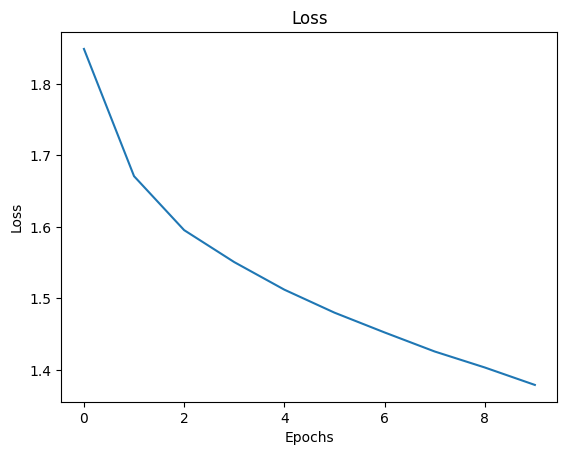

In [6]:
# plot the training history
import matplotlib.pyplot as plt
%matplotlib inline

history = model.history.history
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [7]:
# 4. Evaluate the model
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.3890 - accuracy: 0.5059
test_acc: 0.5059000253677368


313/313 [==============================] - 1s 4ms/step


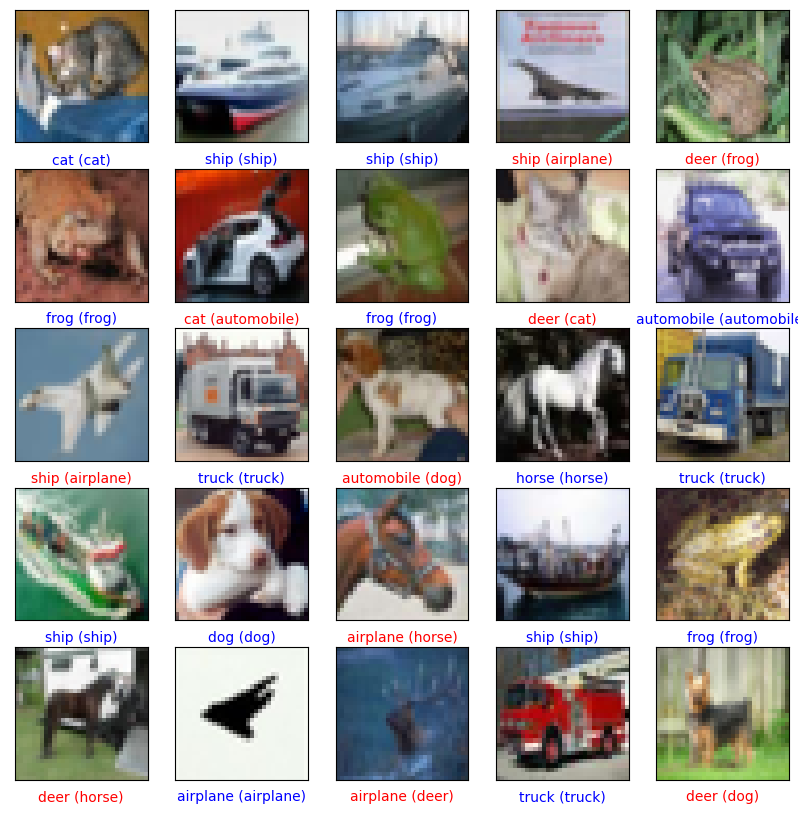

In [8]:
# 5. Use the model to make predictions
# make predictions
predictions = model.predict(test_images)

# plot the predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(32, 32, 3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(cifar_classes[predicted_label], cifar_classes[true_label]), color=color)
plt.show()

In [9]:
# build another model
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))
adam = Adam(learning_rate=0.001)

# compile the model
model2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# train the model
model2.fit(train_images.reshape(50000, 32, 32, 3), train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 22s 55ms/step - loss: 1.6391 - accuracy: 0.4044
Epoch 2/10
391/391 [==============================] - 21s 54ms/step - loss: 1.2708 - accuracy: 0.5461
Epoch 3/10
391/391 [==============================] - 22s 55ms/step - loss: 1.1276 - accuracy: 0.6068
Epoch 4/10
391/391 [==============================] - 22s 57ms/step - loss: 1.0316 - accuracy: 0.6387
Epoch 5/10
391/391 [==============================] - 24s 61ms/step - loss: 0.9551 - accuracy: 0.6679
Epoch 6/10
391/391 [==============================] - 27s 69ms/step - loss: 0.9032 - accuracy: 0.6876
Epoch 7/10
391/391 [==============================] - 31s 80ms/step - loss: 0.8522 - accuracy: 0.7017
Epoch 8/10
391/391 [==============================] - 25s 63ms/step - loss: 0.8010 - accuracy: 0.7204
Epoch 9/10
391/391 [==============================] - 23s 58ms/step - loss: 0.7745 - accuracy: 0.7301
Epoch 10/10
391/391 [==============================] - 22s 57ms/step - loss: 0.730

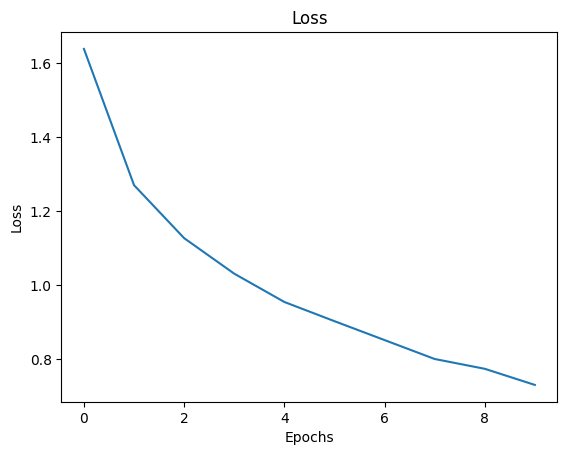

In [12]:
# plot the training history
history2 = model2.history.history
plt.plot(history2['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [13]:
# evaluate the model
test_loss, test_acc = model2.evaluate(test_images.reshape(10000, 32, 32, 3), test_labels)
print('test_acc:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.8405 - accuracy: 0.7075
test_acc: 0.7074999809265137


313/313 [==============================] - 2s 7ms/step


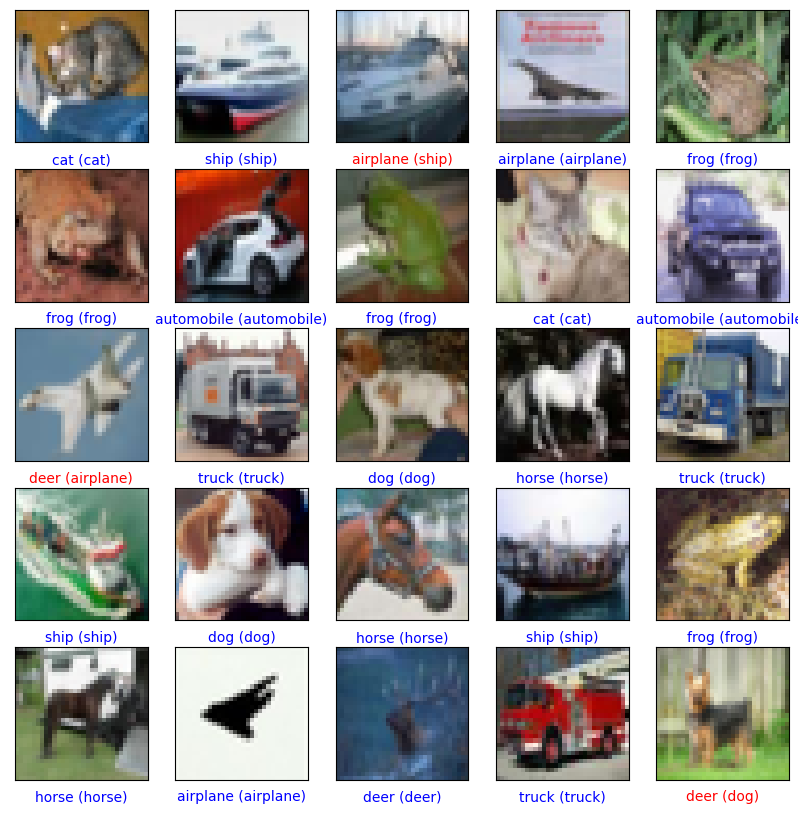

In [14]:
# make predictions
predictions = model2.predict(test_images.reshape(10000, 32, 32, 3))

# plot the predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(32, 32, 3), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(cifar_classes[predicted_label], cifar_classes[true_label]), color=color)
plt.show()


## Conclusion

- Sequential API is the easiest way of making ANNs in TensorFlow 2.0 however Sequential API is the most limited compared to other ways (functional API and Model subclassing).
- The more layers the better accuracy. The more layers the more time-consuming. 